# <center>Livrable 2</center>
___

## Modules import

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Create the ``Cities`` class

In [49]:
class Cities:
    cities = []

    def __init__(self, nb_nodes: int, x_range: tuple[int, int], y_range: tuple[int, int], seed: int=None) -> None:
        if seed:
            random.seed(seed)

        used_coordinates = set()

        while len(self.cities) < nb_nodes:
            x = random.randint(x_range[0], x_range[1])
            y = random.randint(y_range[0], y_range[1])

            if (x, y) not in used_coordinates:
                used_coordinates.add((x, y))
                self.cities.append((len(self.cities) + 1, x, y))


    def calculateDistance(self, city_1: int, city_2: int) -> float:
        city_1 = self.cities[city_1 - 1]
        city_2 = self.cities[city_2 - 1]

        return ((city_1[1] - city_2[1])**2 + (city_1[2] - city_2[2])**2)**0.5

## Create the ``Graph`` class

In [50]:
class Graph:
    def __init__(self, data: tuple[int, int, int], title: str="", xlabel: str="X Coordinate", ylabel: str="Y Coordinate", figsize: tuple[int, int]=(10, 10)) -> None:
        self.data = data
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.figsize = figsize

    def scatter_plot(self, **kwargs) -> None:
        plt.figure(figsize=self.figsize)
        plt.scatter([x[1] for x in self.data], [x[2] for x in self.data], **kwargs)
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        for i, txt in enumerate(self.data):
            plt.annotate(txt[0], (txt[1], txt[2]))
        plt.show()

## Generate cities and display graph

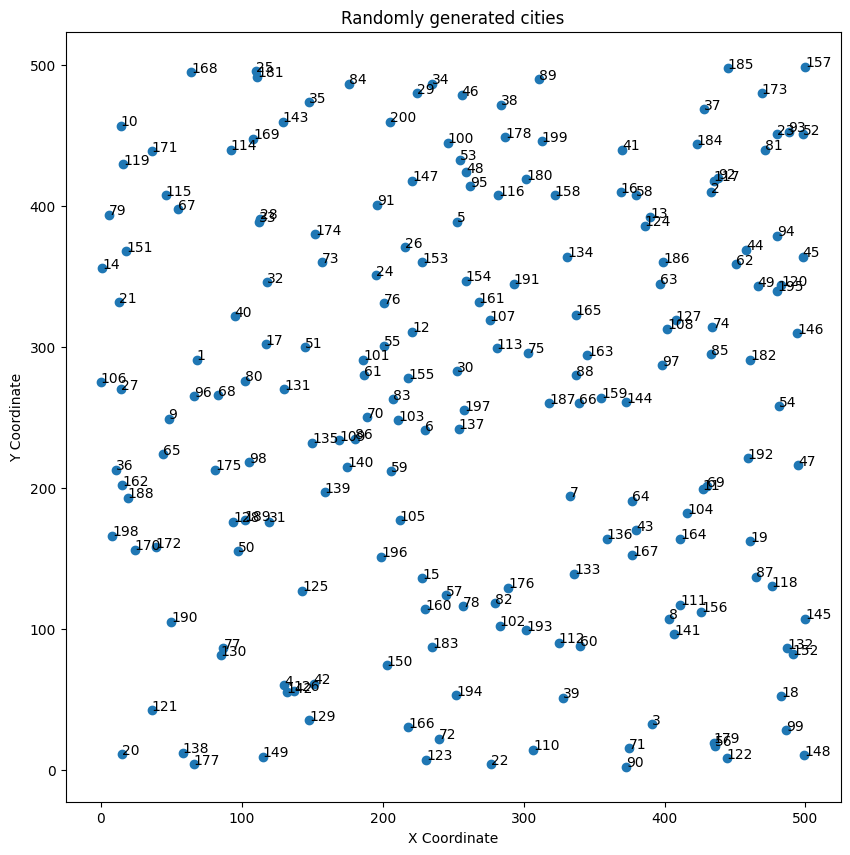

In [51]:
nb_nodes = 200
x_range = (0, 500)
y_range = (0, 500)
seed = 1

data = Cities(nb_nodes, x_range, y_range, seed)

graph = Graph(data=data.cities, title="Randomly generated cities")
graph.scatter_plot()

## Create the ``kMeansClusters`` class

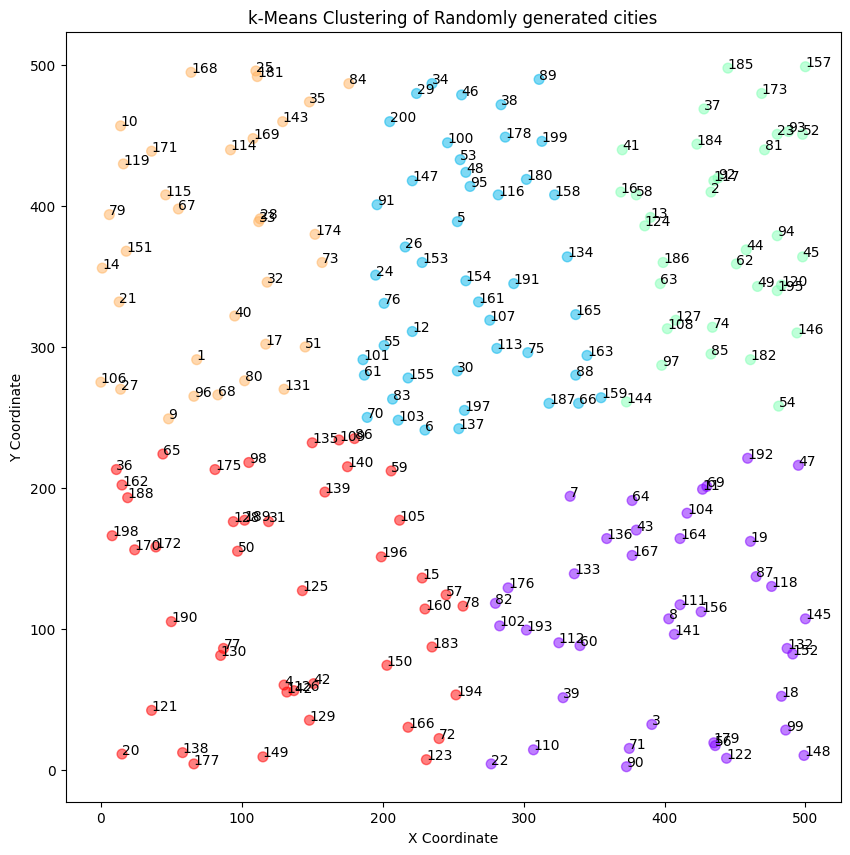

In [53]:
class kMeansClusters:
    def __init__(self, k: int, data: tuple[int, int, int]) -> None:
        self.k = k
        self.data = data
        self.coordinates = np.array([(x, y) for n, x, y in data])
        self.kmeans = KMeans(n_clusters=k, random_state=0)
        self.__fit()

    def __fit(self) -> None:
        self.clusters = self.kmeans.fit_predict(self.coordinates)

    def getClusters(self) -> np.ndarray:
        return self.clusters

    def getCitiesByCluster(self) -> list[list[tuple[int, int, int]]]:
        cities_clusters = [[] for _ in range(self.k)]
        for i in range(self.k):
            for j in range(len(self.clusters)):
                if self.clusters[j] == i:
                    cities_clusters[i].append(self.data[j])
        return cities_clusters


k = 5
k_means = kMeansClusters(k, data.cities)
clusters = k_means.getClusters()
cities_clusters = k_means.getCitiesByCluster()

graph = Graph(data=data.cities, title="k-Means Clustering of Randomly generated cities")
graph.scatter_plot(c=clusters, cmap='rainbow', s=50, alpha=0.5)